In [1]:
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

"""
Data aggregation is the process of grouping data based on some meaningful categories of
the information, Analysis is then performed on each of the groups to report one or more
summary statistics for each
"""

"""
An overview of the split, apply, and combine pattern for data analysis
Grouping by a single column's values
Accessing the results of a pandas grouping
Grouping using the values in multiple columns
Grouping using index levels
Applying aggregation functions to grouped data
An overview of transforming data
Practical examples of transformation: filling with means and z-scores
Using filtering to selectively remove groups of data
Discretization and binning
"""

# The split, apply, and combine (SAC) pattern
""" A dataset is split into smaller pieces based on certain criteria
Each of these pieces are operated upon independently
All the results are then combined back and presented as a sing """

sensor_data = pd.read_csv("sensors.csv")

In [77]:
sensor_data

interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
5          1        accel    X      0.9
6          2        accel    Z      0.2
7          2        accel    Y      0.3
8          2        accel    X      0.8
9          3        accel    Z      0.3
10         3        accel    Y      0.2
11         3        accel    X      0.7
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
17         1  orientation    X      0.1
18         2  orientation    Z      0.0
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

# Group by 

In [78]:
# group_by_sensor is a class which contain information of group
group_by_sensor = sensor_data.groupby('sensor')


In [79]:
#attribute show the number of groups in class
group_by_sensor.ngroups 

2

In [80]:
# return a dictionary with key represent of names of each group; 
# values are array of index labels contain within each group
group_by_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')}

In [93]:
#Access the result of a grouping
def print_groups(group_object):
    for name, group in group_object:
        print (name)
        #print(group[:5])
        print(group)

In [82]:
#examine the content for the groups we created
#A group has been created for each distinct value in the sensor column and the group is named befor the value
print_groups(group_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [83]:
group_by_sensor.size() 
# returns a summary of the size of all the groups


sensor
accel          12
orientation    12
dtype: int64

In [84]:
group_by_sensor.count() 
#return the number of items in each olumn of each group

interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [85]:
group_by_sensor.get_group('accel')[:5] 
#Access to a specific group (DataFrame)

interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

In [86]:
group_by_sensor.head(3) 
#.head() and .tail() method can be used to return the specified number of items in each group

interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [87]:
group_by_sensor.nth(1) 
# return the n-th item in each group =>  returne the second row of each group:

interval axis  reading
sensor                             
accel               0    Y      0.5
orientation         0    Y      0.1

In [88]:
group_by_sensor.describe() 
# a method return statistics for each group; Sorted by acceding order; chi tiet xem them sach

interval                                           reading  \
               count mean       std  min   25%  50%   75%  max   count   
sensor                                                                   
accel           12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   
orientation     12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   

                                                             
                 mean       std  min  25%   50%    75%  max  
sensor                                                       
accel        0.450000  0.328910  0.0  0.2  0.35  0.725  1.0  
orientation  0.133333  0.143548  0.0  0.0  0.10  0.225  0.4

In [89]:
#Group by multiple columns
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

In [94]:
#Grouping using index levels
mi = sensor_data.copy() 
# Make copy of the data and reindex the copy
mi

interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
3          1        accel    Z      0.1
4          1        accel    Y      0.4
5          1        accel    X      0.9
6          2        accel    Z      0.2
7          2        accel    Y      0.3
8          2        accel    X      0.8
9          3        accel    Z      0.3
10         3        accel    Y      0.2
11         3        accel    X      0.7
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
17         1  orientation    X      0.1
18         2  orientation    Z      0.0
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3

In [95]:
mi = mi.set_index(['sensor','axis']) 
#reindex the copy with hierarchical index consist of sensor and axis column
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
            X            1      0.9
            Z            2      0.2
            Y            2      0.3
            X            2      0.8
            Z            3      0.3
            Y            3      0.2
            X            3      0.7
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
            X            1      0.1
            Z            2      0.0
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

In [96]:
#group can now be performed using the various levels of the hierarchical index
print_groups(mi.groupby(level=0)) 
#group by index level 0: 'sensor' index 

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
       X            1      0.9
       Z            2      0.2
       Y            2      0.3
       X            2      0.8
       Z            3      0.3
       Y            3      0.2
       X            3      0.7
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
            X            1      0.1
            Z            2      0.0
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3


In [97]:
# Groupby multiple levels can be performed by passing the levels in a list
print_groups((mi.groupby(level=['sensor','axis'])))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

# Applying aggregate functions, transforms, and filters


In [98]:
sensor_axis_grouping = mi.groupby(level =['sensor', 'axis'])

In [100]:
print_groups(sensor_axis_grouping)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [101]:
# An aggregation function can be applied to each group using the .agg() method of the GroupBy object. 
# The parameter of .agg() is reference to a function that will be applied to each group. In case of DataFrame, 
# this function will be applied to each column of data within the group
sensor_axis_grouping.agg(np.mean)
#calculating the mean of the value for each sensor and axis

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [102]:
sensor_axis_grouping.mean()
# Aggregation functions are built in directly to the GroupBy object to save you some typing. 
# this code have the same meaning with the code above

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [103]:
sensor_axis_grouping.agg([np.sum, np.std])
#Apply multiple aggregation fuctions at once

interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [104]:
# A different function can be applied to each column by passing a Python dictionary to .agg()
# The keys of the dictionary represent the column name that the function is to be applied to,
# and the value of each dictionary entry is the function

sensor_axis_grouping.agg({'interval': len,         #apply len for inverval column
                          'reading': np.mean})     #apply mean for reading column

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [106]:
sensor_axis_grouping['reading'].mean() #Aggregation can also be performed on specific columns using []

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

# Transforming groups of data

In [107]:
""" A GrougpBy object provides a .transform() method that applies a function to all values in the DataFrame in each group
    And returns another DataFrame that has the following characteristic
    It is indexed identically to the concatenation of the indexes in all the groups
    The number of rows is equal to the sum of the number of rows in all the groups
    It consists of non-grouped columns to which pandas has successfully applied the
    given function (some columns can be dropped)
"""
# a DataFrame to use for examples
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz',
                                          'fiz', 'buz']},
                              index = list('VWXYZ'))

In [108]:
transform_data

Label  Values  Values2 Other
V     A       0        5   foo
W     C       1        6   bar
X     B       2        7   baz
Y     A       3        8   fiz
Z     C       4        9   buz

In [109]:
 # group by column Label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [110]:
# Add ten to all column in the label
    # pandas attempts to apply the function to all the columns, but since 'Label' and Other ->
    # -> columns have string values, the transformation function fails (it will throw an exception).
    # Because of that failure, those two columns are omitted from the result
grouped_by_label.transform(lambda x: x + 10) 
# The result is also non-grouped, as the grouping structure is removed from the result of a transformation;
# the resulting object will have an index that matches the original DataFrame object, in this case: V,W,X,Y,Z

Values  Values2
V      10       15
W      11       16
X      12       17
Y      13       18
Z      14       19

In [119]:
# Filling missing values with the mean of the group
"""
A common transformation in statistical analysis with grouped data is to replace missing
data within each group with the mean of the non-/B/ values in the group
"""
f = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})

In [112]:
df

Label  Values
0     A    10.0
1     B    20.0
2     A    11.0
3     B     NaN
4     A    12.0
5     B    22.0

In [113]:
grouped = df.groupby('Label')
grouped

In [114]:
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [115]:
# calculate the mean of the two groups
grouped.mean()

Values
Label        
A        11.0
B        21.0

In [116]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs
# index 3 in grouped is NaN now change by 21 in filled_NaNs

Values
0    10.0
1    20.0
2    11.0
3    21.0
4    12.0
5    22.0

# Calculating normalized z-scores with a transformation

In [123]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), #mean = 0.5; standard deviation = 2
                 pd.date_range('2013-01-01', periods=365*3)) # data is indexed by day

periods = 100
data

2013-01-01    1.438225
2013-01-02   -0.065727
2013-01-03   -2.518117
2013-01-04   -1.771265
2013-01-05    2.924224
                ...   
2015-12-27   -0.276625
2015-12-28    0.259735
2015-12-29    1.404361
2015-12-30   -0.106687
2015-12-31    1.796756
Freq: D, Length: 1095, dtype: float64

In [124]:
#a rolling mean is calculated on 100 day window to generate sample of the mean
""" 
Pandas dataframe.rolling() function provides the feature of rolling window calculations. 
The concept of rolling window calculation is most primarily used in signal processing and time series data. 
In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. 
A window of size k means k consecutive values at a time
https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/
https://www.w3resource.com/pandas/series/series-rolling.php
"""
rolling = data.rolling(
    
#Size of the moving window
    window=periods,
    
#So luong gia tri toi thieu quan sat duoc trong cua so de co duoc ket qua, nhu trong vi du la mean (neu ko du tra NaN): 
#trong vi du: cua so phai du 100 gia tri without NaN thi moi tinh trung binh
    min_periods=periods,
    
#center: Set the labels at the center of the window.
    center=False).mean().dropna() 
#rolling[:5]
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

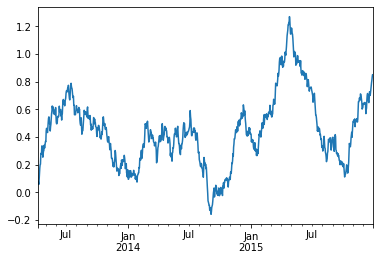

In [122]:
 # visualize the series
rolling.plot();

In [127]:
# calculate mean and std by year
group_key = lambda x: x.year
# nhom cac gia tri theo nam. 
#More detail: 
#wesmckinney.com/blog/groupby-fu-improvements-in-grouping-and-aggregating-data-in-pandas/
groups = rolling.groupby(group_key)
print_groups(groups)

2013
2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2013-12-27    0.207830
2013-12-28    0.139979
2013-12-29    0.147877
2013-12-30    0.111336
2013-12-31    0.163912
Freq: D, Length: 266, dtype: float64
2014
2014-01-01    0.117808
2014-01-02    0.094268
2014-01-03    0.095311
2014-01-04    0.109263
2014-01-05    0.154128
                ...   
2014-12-27    0.468097
2014-12-28    0.450942
2014-12-29    0.463802
2014-12-30    0.421640
2014-12-31    0.428591
Freq: D, Length: 365, dtype: float64
2015
2015-01-01    0.422732
2015-01-02    0.419439
2015-01-03    0.365094
2015-01-04    0.383965
2015-01-05    0.363668
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 365, dtype: float64


In [128]:
# Tinh trung binh va do lech chuan theo tung nam
groups.agg([np.mean, np.std]) 

mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [129]:
 # normalize to the z-score
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed

2013-04-10   -2.213125
2013-04-11   -2.307837
2013-04-12   -2.122115
2013-04-13   -1.866325
2013-04-14   -1.618471
                ...   
2015-12-27    0.768548
2015-12-28    0.857598
2015-12-29    0.912124
2015-12-30    0.880561
2015-12-31    0.902772
Freq: D, Length: 996, dtype: float64

In [130]:
# group_key = lambda x: x.year
group_key

<function __main__.<lambda>(x)>

In [131]:
normed.groupby(group_key).agg([np.mean, np.std])

mean  std
2013 -3.172066e-17  1.0
2014 -1.881296e-15  1.0
2015 -1.492261e-15  1.0

In [132]:
compared = pd.DataFrame({ 'Original': rolling,  # plot original vs normalize
                          'Normed': normed })

In [133]:
compared

Original    Normed
2013-04-10  0.073603 -2.213125
2013-04-11  0.057313 -2.307837
2013-04-12  0.089255 -2.122115
2013-04-13  0.133248 -1.866325
2013-04-14  0.175876 -1.618471
...              ...       ...
2015-12-27  0.811402  0.768548
2015-12-28  0.835961  0.857598
2015-12-29  0.850998  0.912124
2015-12-30  0.842293  0.880561
2015-12-31  0.848419  0.902772

[996 rows x 2 columns]

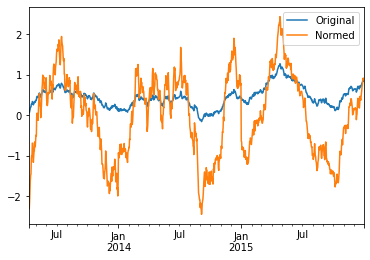

In [134]:
compared.plot()

# Filtering groups from aggregation

In [12]:
"""
Groups of data can be selectively dropped from processing using .filter()
This method is supplied a function that can be used to make group-level decisions on whether the entire
group is included in the result after the combination.
The function should return True if the group is to be included in the result and False to exclude it.
"""
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})

In [13]:
for label, value in df.groupby('Label'): #groupby('Label') is an object let us iterate
    print(label)
    print(label, value)
    

A
A   Label  Values
0     A     1.0
1     A     2.0
B
B   Label  Values
2     B     3.0
C
C   Label  Values
3     C     4.0
4     C     NaN
5     C     8.0


In [14]:
# drop groups with one or fewer non-NaN (ko phai NaN) values
f = lambda x: x.Values.count() > 1 
#count the number of value appear in Values column; return true if the number > 1 and fail if not

In [15]:
df.groupby('Label').filter(f)
#group data by 'Label'
#drop Label'B' because it has one value in Values column (return fail in filter(f)); return the rest

Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [16]:
# drop any groups with NaN values
# Series.isnull() return a boolen series (same index): 
# if the value is not NaN return False, else return True

# sum value True of x.Values.isnull() :a boolen Series
f = lambda x: x.Values.isnull().sum() == 0
#if lable have no NaN => f == 0 => return True
#if lable have NaN (as lable 'B') => f = 1 !=0 => return fail => filter out

df.groupby('Label').filter(f) #The following example will omit groups that have any NaN values

Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [17]:
t = pd.Series([1, 2, 3, np.NaN, 4])
df1 = pd.DataFrame(t, columns = ['Values'])
df1

Values
0     1.0
1     2.0
2     3.0
3     NaN
4     4.0

In [18]:
df1.Values.isnull()

0    False
1    False
2    False
3     True
4    False
Name: Values, dtype: bool

In [19]:
df1.Values.isnull().sum()

1

In [20]:
"""
The next example will only select groups that have a mean that is greater than 2.0, the mean
of the entire data set (basically, this selects groups of data that have an exceptional behavior
as compared to the whole):
"""
# select groups with a mean of 2.0 or greater
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

Label  Values
3     C     4.0
4     C     NaN
5     C     8.0

In [25]:
test1 = df.groupby('Label')
test1.mean()

Values
Label        
A         1.5
B         3.0
C         6.0

In [27]:
test1.mean().mean()

Values    3.5
dtype: float64